## Pattern Recognition Assignment 7

# IMDB Movie Review Sentiment Classification Using RNN

### Import Important Packages

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, BatchNormalization, Flatten, Embedding, ReLU, SimpleRNN
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import numpy as np

### Load and Split Data

In [2]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

17464789/17464789 [==============================] - 2s 0us/step


In [3]:
(X_train.shape, X_test.shape)

((25000,), (25000,))

In [4]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [5]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

### Preprocessing

In [6]:
(X_train.shape, X_test.shape)

((25000, 500), (25000, 500))

Create The Model

In [7]:
epochs = 5
batch_size = 32
loss = tf.losses.binary_crossentropy
optimizer = tf.optimizers.Adam(0.0005)
metrics = ['accuracy']

In [8]:
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 162,113
Trainable params: 162,113
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 298s 467ms/step - loss: 0.6108 - accuracy: 0.6478 - val_loss: 0.5295 - val_accuracy: 0.7354
Epoch 2/5
625/625 [==============================] - 253s 404ms/step - loss: 0.4649 - accuracy: 0.7819 - val_loss: 0.4199 - val_accuracy: 0.8146
Epoch 3/5
625/625 [==============================] - 247s 396ms/step - loss: 0.3020 - accuracy: 0.8759 - val_loss: 0.3602 - val_accuracy: 0.8526
Epoch 4/5
625/625 [==============================] - 242s 388ms/step - loss: 0.2131 - accuracy: 0.9200 - val_loss: 0.3601 - val_accuracy: 0.8570
Epoch 5/5
625/625 [==============================] - 243s 388ms/step - loss: 0.2609 - accuracy: 0.8888 - val_loss: 0.5074 - val_accuracy: 0.7600


In [10]:
model.evaluate(X_test, y_test)

782/782 [==============================] - 33s 42ms/step - loss: 0.4923 - accuracy: 0.7754


[0.49234917759895325, 0.7753599882125854]

### Plot Training Curve

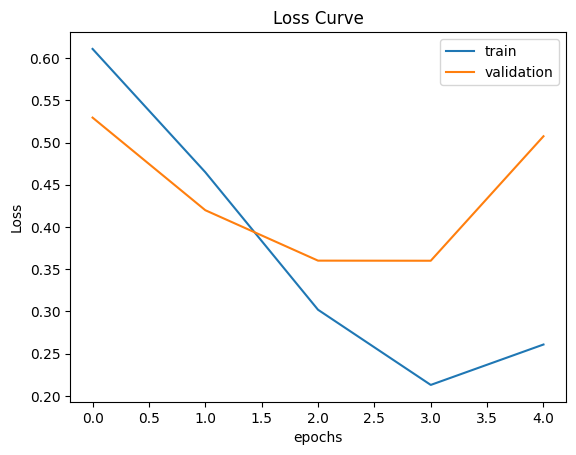

In [11]:
plt.plot(range(epochs), history.history['loss'], label='train')
plt.plot(range(epochs), history.history['val_loss'], label='validation')
plt.title('Loss Curve')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

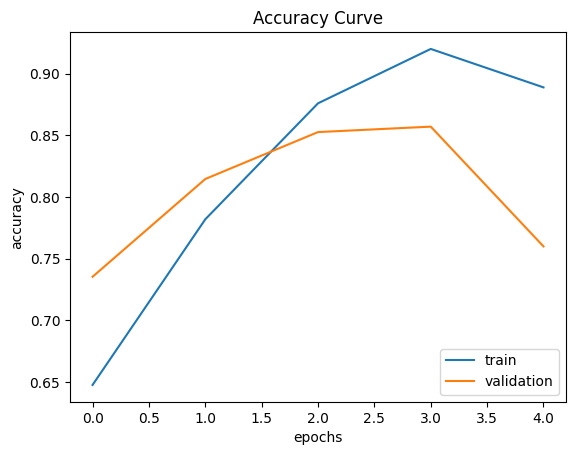

In [12]:
plt.plot(range(epochs), history.history['accuracy'], label='train')
plt.plot(range(epochs), history.history['val_accuracy'], label='validation')
plt.title('Accuracy Curve')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()

### opimum Number Of Epoch is 3